### Price Predictor


In [1]:
import numpy as np
import pandas as pd

In [2]:
h=pd.read_csv("housing.csv")

In [3]:
h.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,NaN,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,NaN,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2    INDUS    506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     502 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
h['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN  '}>,
        <AxesSubplot:title={'center':' INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX '}>,
        <AxesSubplot:title={'center':'RM  '}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS '}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO '}>,
        <AxesSubplot:title={'center':'B '}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

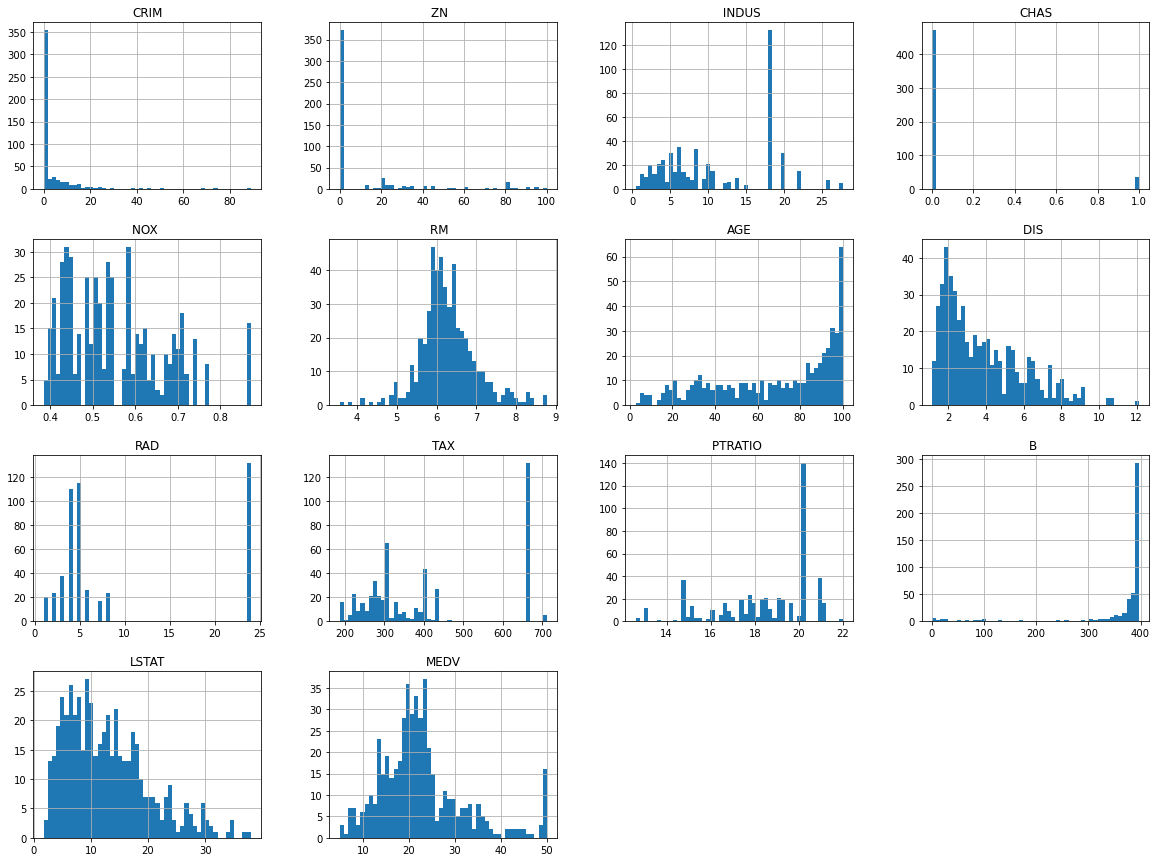

In [8]:
h.hist(bins=50,figsize=(20,15))

##Train-Test Splitting


In [9]:
#import numpy as np
#def split_train_test(data,test_ratio):
#    np.random.seed(42)
#    shuffled=np.random.permutation(len(data))
#    test_set_size=int(len(data)*test_ratio)
#    test_indices=shuffled[:test_set_size]
#   train_indices=shuffled[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set,test_set=split_train_test(h,0.2)

In [11]:
#print(f"Rows in TRAIN SET:{len(train_set)}\nRows in TEST SET:{len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(h,test_size=0.2,random_state=42)
print(f"Rows in TRAIN SET:{len(train_set)}\nRows in TEST SET:{len(test_set)}")

Rows in TRAIN SET:404
Rows in TEST SET:102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit  
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(h,h['CHAS']):
    strat_train_set=h.loc[train_index]
    strat_test_set=h.loc[test_index]

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.176200,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.807078,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.427500,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.685000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.305000,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
h=strat_train_set.copy()

## CORRELATIONS

In [16]:

corr_matrix = h.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False) 

MEDV        1.000000
RM          0.679894
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
 INDUS     -0.473516
PTRATIO    -0.493534
LSTAT      -0.740356
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

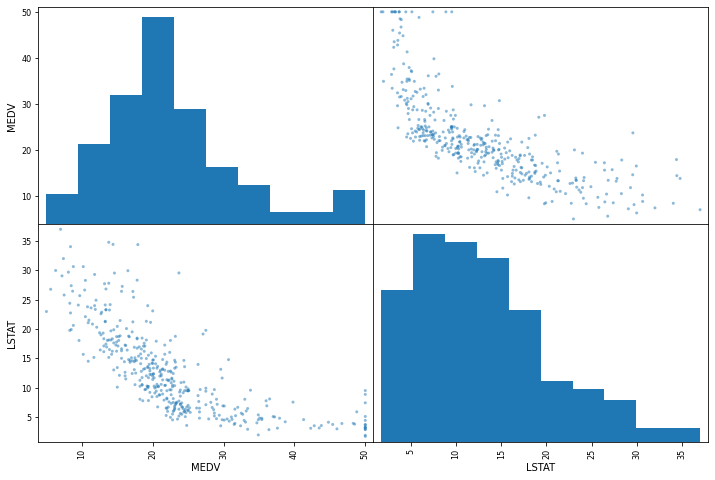

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "LSTAT"]
scatter_matrix(h[attributes], figsize= (12,8))

<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

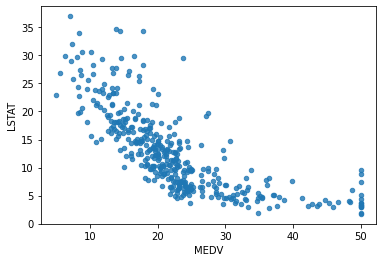

In [19]:
h.plot(kind="scatter", x="MEDV", y="LSTAT", alpha=0.8)

## Attributes Combination

In [20]:
h["TAXMEDV"]=h["TAX"]/h["MEDV"]

In [21]:
h.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXMEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,14.383562
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,11.428571
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,39.880240
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,12.424242
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,12.478261


In [22]:
h=strat_train_set.drop("MEDV",axis=1)
h_labels=strat_train_set["MEDV"].copy()

In [23]:
'''Missing Attributes
To take care of missing attribbutes we can do the following
1.Get rid of the misssing data point
2.Get rid of the whole attributes
3.Set the value to some median/mean/0 ''' 



'Missing Attributes\nTo take care of missing attribbutes we can do the following\n1.Get rid of the misssing data point\n2.Get rid of the whole attributes\n3.Set the value to some median/mean/0 '

In [24]:
a=h.dropna(subset=['LSTAT'])
a.shape
#option1

(402, 13)

In [25]:
h.drop("LSTAT",axis=1)
#option2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92


In [26]:
median=h.median()

In [27]:
h["LSTAT"].fillna(median)

254     6.57
348     5.99
476    18.68
321     6.87
326     6.15
       ...  
155    15.02
423    23.29
98      3.57
455    18.13
216    13.51
Name: LSTAT, Length: 404, dtype: float64

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(h)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.16500e+01])

In [30]:
 X=imputer.transform(h)

In [31]:
h_tr=pd.DataFrame(X,columns=h.columns)

In [32]:
h_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.823762
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.216079
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.915000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.650000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SKIT-LEARN DESIGN


In [33]:
#Creating Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
     
    ('std_scaler', StandardScaler()),
])

In [35]:
h_num_tr=my_pipeline.fit_transform(h_tr)

In [36]:
h_num_tr.shape


(404, 13)

## Selecting an Model


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=DecisionTreeRegressor()
model.fit(h_num_tr, h_labels)

DecisionTreeRegressor()

In [38]:
 some_data=h.iloc[:5]

In [39]:
some_labels=h_labels.iloc[:5]


In [40]:
prepared_data=my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [42]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model


In [43]:
from sklearn.metrics import mean_squared_error
h_predictions=model.predict(h_num_tr)
mse=mean_squared_error(h_labels,h_predictions)


In [44]:
mse

0.0

## Using cross validation


In [45]:
from sklearn.model_selection  import cross_val_score
scores=cross_val_score(model,h_num_tr,h_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [46]:
rmse_scores

array([3.87298335, 5.53423932, 4.84793142, 4.10344888, 7.12434207,
       2.78451073, 5.04856415, 4.6708404 , 7.15732143, 3.66247867])

In [56]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())

In [57]:
print_scores(rmse_scores)

scores: [3.87298335 5.53423932 4.84793142 4.10344888 7.12434207 2.78451073
 5.04856415 4.6708404  7.15732143 3.66247867]
mean: 4.880666040921322
standard deviation: 1.3496305626111083


 ## After analysing the mean and sd from Decision Tree, Linear Regression, Random Forest Regression we can say that Random Forest Regression is producing the best values.

## Saving the model

In [59]:
from joblib import dump,load
dump(model,'XYZ.joblib')

['XYZ.joblib']

## TESTING THE MODEL

In [63]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[22.  10.9 26.5 18.5 16.6 14.2 18.5 13.8 29.  43.8 19.8 11.9 22.6 50.
 18.5 11.3 28.7 13.1 23.1 20.  23.  21.7 15.  19.4 16.1 30.8 16.1 32.4
 10.2 34.7 22.  24.5 19.6 11.9 22.3 11.7 48.8 25.3 20.7 45.4 25.  33.8
 22.6 23.3 21.7 37.  48.3 20.6 19.3 21.9 16.8 19.1 18.9 13.8 21.  31.7
 37.6 31.2 18.5 19.6 50.   5.  22.  22.3 13.8 34.7 19.1 20.1 19.9 25.
 22.1 21.6 21.7 22.  34.7  8.1 15.6 18.6 20.6 14.5 21.  20.  14.5 20.5
 23.3 21.4 13.1 19.6 25.  23.7 20.1 27.9  5.6 24.  16.2 32.  19.3 28.7
 16.4 23.  22.  18.7] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2,

In [61]:
final_rmse

4.347401748261174